In [1]:
from dll.spin_procesor import Quantum_Spin_Proces
from qutip import basis
import numpy as np
import matplotlib.pyplot as plt


from qutip import Bloch
from matplotlib import cm
import matplotlib as mpl

In [2]:
def plot_measure_continuous(ax, t, probability_i, i):
    color_palette = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
        "#bcbd22", "#17becf", "#aec7e8", "#ffbb78",
        "#98df8a", "#ff9896", "#c5b0d5", "#c49c94"
    ]
    ax.plot(t*1e9, probability_i, c=color_palette[i],
            alpha=0.7, label=f"Probability of state {i}")
    #ax.set_ylabel(rf'$P(\left| {i} \right\rangle)$', fontsize=14)
    ax.set_ylabel(rf'$P$', fontsize=14)
    ax.set_xlabel(r'$time [ns]$', fontsize=14)
    ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid()

In [3]:
def plot_measure_scatter(ax, t, probability_i, i, N=1000, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    color_palette = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
        "#bcbd22", "#17becf", "#aec7e8", "#ffbb78",
        "#98df8a", "#ff9896", "#c5b0d5", "#c49c94"
    ]
    
    # Convertir probability_i a un array numpy si no lo es
    probability_i = np.array(probability_i)

    # Seleccionar N índices aleatorios de los datos
    random_indices = np.random.choice(len(t), size=N, replace=False).astype(int)
    selected_t = t[random_indices]
    selected_probability_i = probability_i[random_indices]

    # Crear lista de 16 tipos de marcadores distintos
    marker_types = ['o', 's', '^', 'v', 'D', 'P', '*', 'X', '>', '<', 'h', 'd', '|', '_', '+', '.']

    ax.scatter(selected_t*1e9, selected_probability_i, c=color_palette[i],
                alpha=0.7, label=f"Probability of state {i}",
                  marker=marker_types[i])
    ax.set_ylabel(rf'$P$', fontsize=14)
    ax.set_xlabel(r'$time [ns]$', fontsize=14)
    ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid()


In [4]:
def calculate_T1(T2, T2start):
    T1 = (1/2)*((T2*T2start)/(T2start - T2))
    return T1

In [5]:
def measure_compuse_states(procesor, list_states_overlap):

    n_states_time = len(procesor.states_in_time)
    Measure_0 = []
    Measure_1 = []

    for i in range(n_states_time):

        states_i = procesor.states_in_time[i]
        get_statest = [state.full() for state in states_i]

        state_0 = list_states_overlap[0]
        probability_0 = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
        Measure_0.extend(probability_0)

        state_1 = list_states_overlap[1]
        probability_1 = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]
        Measure_1.extend(probability_1)
    
    time = np.linspace(0, procesor.global_time, len(Measure_1))
    return time, Measure_0, Measure_1

# Rx

## Time evolution

### Without noise

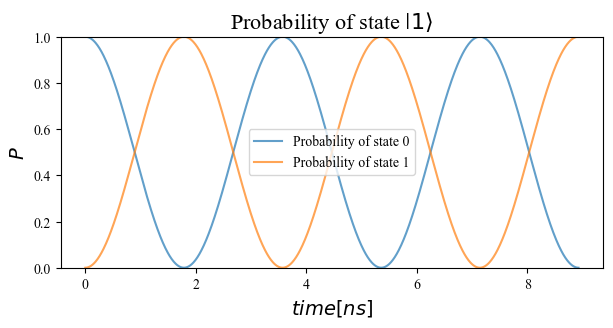

In [26]:
# Estado inicial
ket_0 = basis(2, 0)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000)
angle = 5*np.pi
out = procesor_1.Rx(angle, ket_0, tf_expect=False)

# get tme and states:
t = procesor_1.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = np.array([[1, 0]])
probability_0 = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = np.array([[0, 1]])
probability_1 = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plt.show()

### with noise coherent

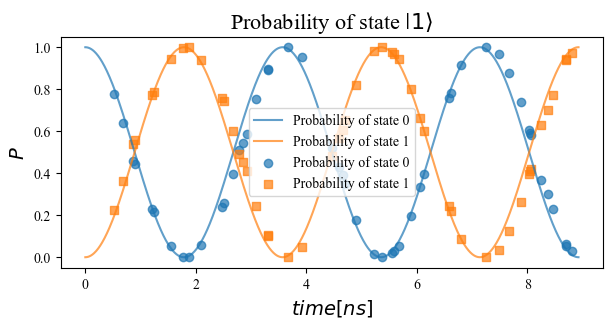

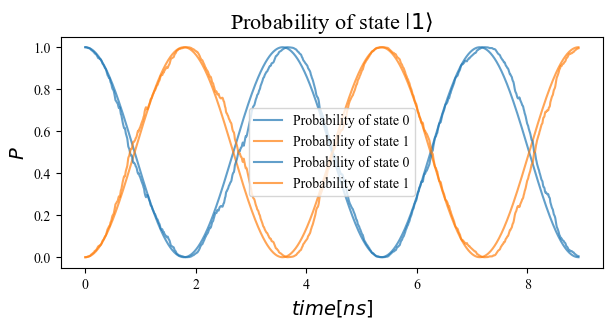

In [62]:
# Estado inicial
ket_0 = basis(2, 0)

# Def procesador
procesor_2 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = True, noise_std = 0.0159)
angle = 5*np.pi
out = procesor_2.Rx(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy = procesor_2.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = np.array([[1, 0]])
probability_0_noisy = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = np.array([[0, 1]])
probability_1_noisy = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plot_measure_scatter(ax, t_noisy, probability_0_noisy, 0, N=50, random_seed=42)
plot_measure_scatter(ax, t_noisy, probability_1_noisy, 1, N=50, random_seed=42)
plt.show()


fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plot_measure_continuous(ax, t_noisy, probability_0_noisy, 0)
plot_measure_continuous(ax, t_noisy, probability_1_noisy, 1)
plt.show()

### with quantum noisy

1.176529588766299e-08
1.0199999999999943e-06


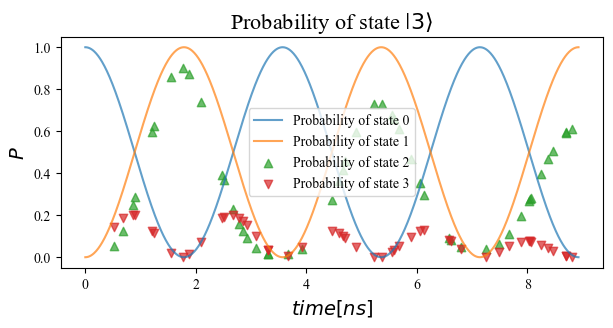

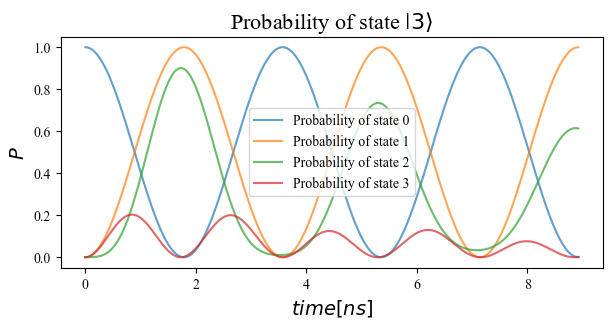

In [28]:
# Estado inicial
ket_0 = basis(2, 1)

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
print(T1c)
procesor_3 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = False, noise_std = 0.0159,
                                  tf_quantum_noise = True, T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_3.Rx(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy_q = procesor_3.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = np.array([[1, 0]])
probability_0_noisy_q = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = np.array([[0, 1]])
probability_1_noisy_q = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plot_measure_scatter(ax, t_noisy_q, probability_0_noisy_q, 2, N=50, random_seed=42)
plot_measure_scatter(ax, t_noisy_q, probability_1_noisy_q, 3, N=50, random_seed=42)
plt.show()


fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plot_measure_continuous(ax, t_noisy_q, probability_0_noisy_q, 2)
plot_measure_continuous(ax, t_noisy_q, probability_1_noisy_q, 3)
plt.show()

### with both noises

1.176529588766299e-08
1.0199999999999943e-06


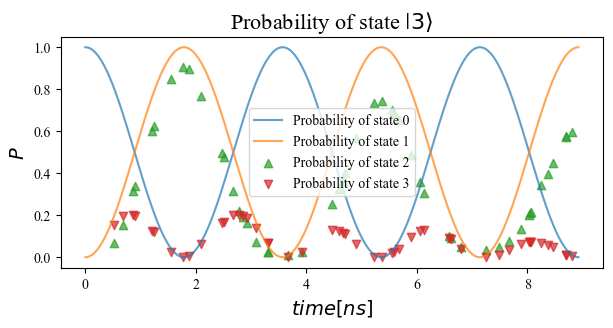

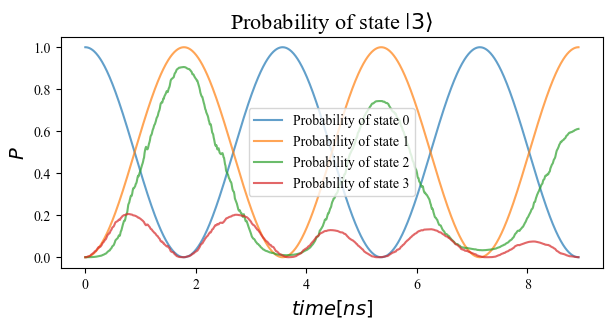

In [30]:
# Estado inicial
ket_0 = basis(2, 1)

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
print(T1c)

procesor_4 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = True, noise_std = 0.0159,
                                  tf_quantum_noise = True, T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_4.Rx(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy_cq = procesor_4.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = np.array([[1, 0]])
probability_0_noisy_cq = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = np.array([[0, 1]])
probability_1_noisy_cq = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plot_measure_scatter(ax, t_noisy_cq, probability_0_noisy_cq, 2, N=50, random_seed=42)
plot_measure_scatter(ax, t_noisy_cq, probability_1_noisy_cq, 3, N=50, random_seed=42)
plt.show()


fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plot_measure_continuous(ax, t_noisy_cq, probability_0_noisy_cq, 2)
plot_measure_continuous(ax, t_noisy_cq, probability_1_noisy_cq, 3)
plt.show()

# Rz

C:\Users\UNALMAN\AppData\Local\Temp\ipykernel_40092\1326698547.py:4: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  ket_0 = hadamard_transform() * ket_00


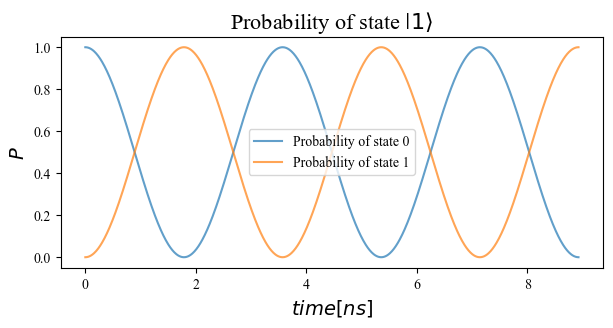

1.176529588766299e-08
1.0199999999999943e-06
1.176529588766299e-08
1.0199999999999943e-06


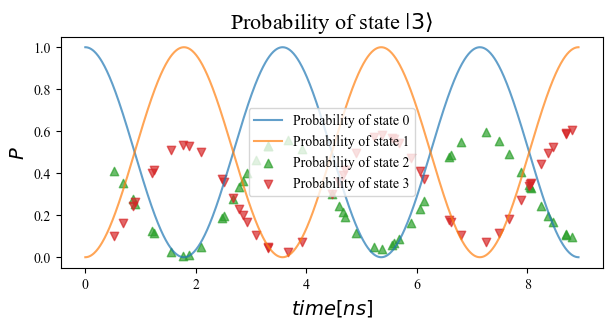

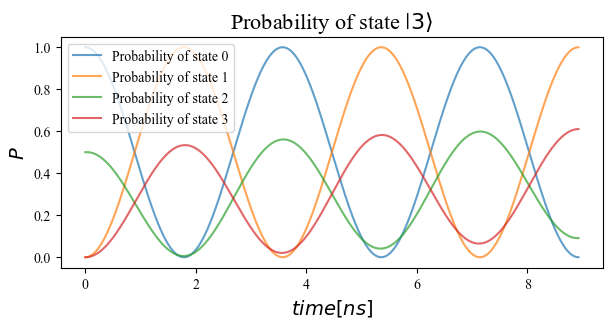

In [48]:
# Estado inicial
from qutip import hadamard_transform
ket_00 = basis(2, 0)
ket_0 = hadamard_transform() * ket_00

# =================
# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000)
angle = 5*np.pi
out = procesor_1.Rz(angle, ket_0, tf_expect=False)

# get tme and states:
t = procesor_1.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = (1/np.sqrt(2))*(np.array([[1, 0]]) + np.array([[0, 1]]))
probability_0 = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = (1/np.sqrt(2))*(np.array([[1, 0]]) - np.array([[0, 1]]))
probability_1 = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plt.show()

# =================
# Def procesador
procesor_2 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = True, noise_std = 0.0159)
angle = 5*np.pi
out = procesor_2.Rz(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy = procesor_2.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = (1/np.sqrt(2))*(np.array([[1, 0]]) + np.array([[0, 1]]))
probability_0_noisy = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = (1/np.sqrt(2))*(np.array([[1, 0]]) - np.array([[0, 1]]))
probability_1_noisy = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# =================
# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
print(T1c)
procesor_3 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = False, noise_std = 0.0159,
                                  tf_quantum_noise = True, T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_3.Rz(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy_q = procesor_3.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = (1/np.sqrt(2))*(np.array([[1, 0]]) + np.array([[0, 1]]))
probability_0_noisy_q = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = (1/np.sqrt(2))*(np.array([[1, 0]]) - np.array([[0, 1]]))
probability_1_noisy_q = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]


# =================
# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
print(T1c)

procesor_4 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = True, noise_std = 0.0159,
                                  tf_quantum_noise = True, T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_4.Rz(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy_cq = procesor_4.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = (1/np.sqrt(2))*(np.array([[1, 0]]) + np.array([[0, 1]]))
probability_0_noisy_cq = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = (1/np.sqrt(2))*(np.array([[1, 0]]) - np.array([[0, 1]]))
probability_1_noisy_cq = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plot_measure_scatter(ax, t_noisy_cq, probability_0_noisy_cq, 2, N=50, random_seed=42)
plot_measure_scatter(ax, t_noisy_cq, probability_1_noisy_cq, 3, N=50, random_seed=42)
plt.show()


fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plot_measure_continuous(ax, t_noisy_cq, probability_0_noisy_cq, 2)
plot_measure_continuous(ax, t_noisy_cq, probability_1_noisy_cq, 3)
plt.show()

# Ry

3


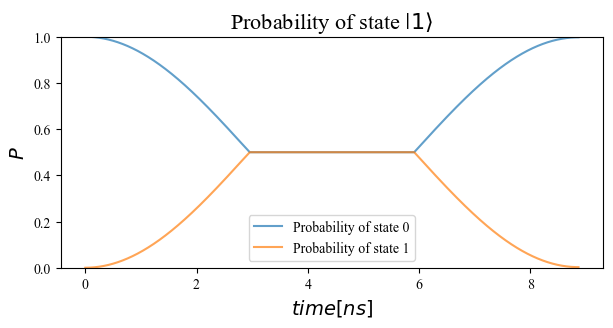

In [30]:
# Estado inicial
ket_0 = basis(2, 0)

# =================
# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000)
angle = 4*np.pi -0.1
out = procesor_1.Ry(angle, ket_0, tf_expect=False)

list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]
t,probability_0, probability_1 = measure_compuse_states(procesor_1, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plt.show()

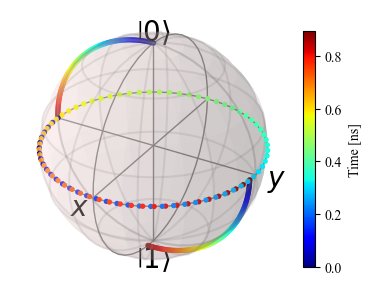

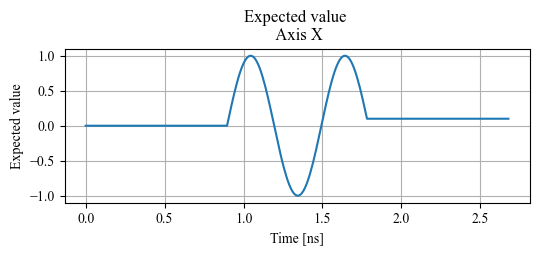

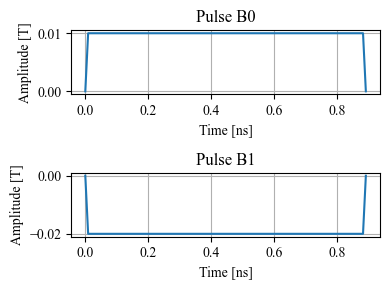

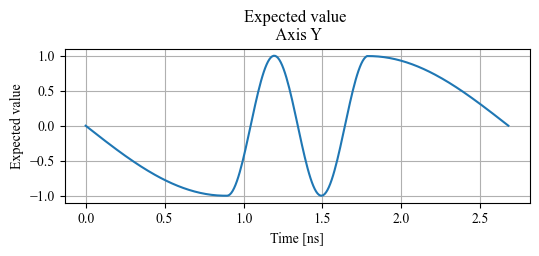

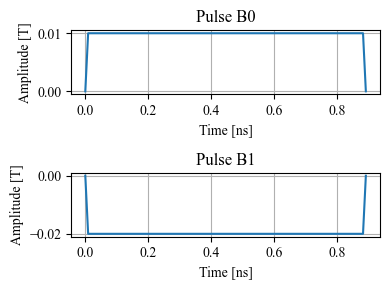

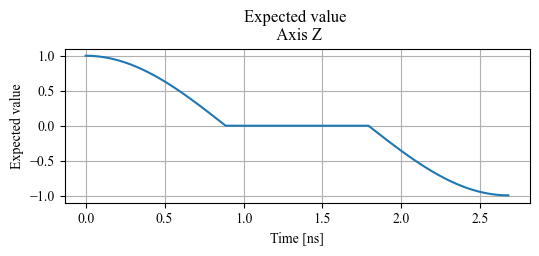

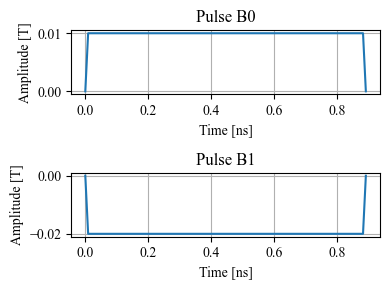

In [28]:
model = Quantum_Spin_Proces(tf_noise = False, noise_std = 0.1)
ket_0 = basis(2, 0)
out = model.Ry(3*np.pi -0.1 , ket_0, tf_expect=True)
model.plot_expect(out, True)
model.plot_excharges(out, 0, True)
model.plot_excharges(out, 1, True)
model.plot_excharges(out, 2, True)



# Li


In [8]:
from dll.main_fun import make_IRIS_v2
from dll. baseline_dru import Modelo_DRU
from dll.models import qcircuit_1_qubit_mixed
from dll.cost_fub import fidelity_cost

In [9]:
N_layeres = 2
n_classes = 3
n_features = 2
X, y =  make_IRIS_v2(n_features, n_classes)

In [10]:
model = Modelo_DRU(qcircuit_1_qubit_mixed, fidelity_cost,
                   epochs = 1, n_clases = n_classes, n_qubits = 1,
                   features = n_features, alpha_noise = 0.0, save_process=False,
                   num_layers = N_layeres)

paramters_1q, bias_1q = model.fit(X, y)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\UNALMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_wrapper.py:156: ComplexWarning: Casting complex values to real discards the imaginary part
  return A.astype(dtype, order, casting, subok, copy)
c:\Users\UNALMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_vjps.py:99: RuntimeWarning: divide by zero encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)
c:\Users\UNALMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_vjps.py:99: RuntimeWarning: invalid value encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)
Epoch: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


In [11]:
# data set:
from dll.gate_procesor import CompositeGateProcessor


# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)



dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=1000,
                                     N_qubits = 1,
                                    tf_noise = True, noise_std = 0.019,
                                    tf_quantum_noise = True, T1= T1c, T2 = T2c)

state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)

1.0199999999999943e-06
1.0199999999999943e-06
1.0199999999999943e-06
1.0199999999999943e-06
1.0199999999999943e-06
1.0199999999999943e-06
1.0199999999999943e-06
1.0199999999999943e-06
1.0199999999999943e-06
1.0199999999999943e-06


In [16]:
dru_circuit.omegas_x

[1760000000.0, 1760000000.0, 1760000000.0, 1760000000.0]

10


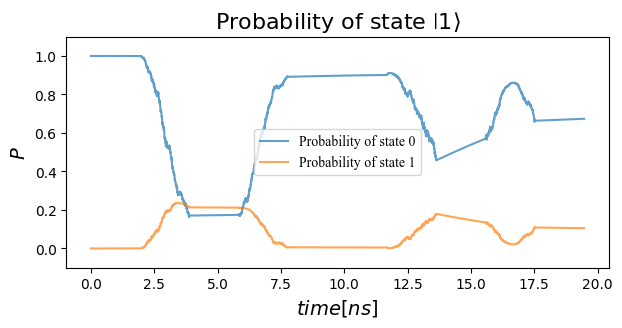

In [14]:
list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]
t,probability_0, probability_1 = measure_compuse_states(dru_circuit, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plt.ylim(-0.1, 1.1)
plt.show()

# Frecuencia

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1

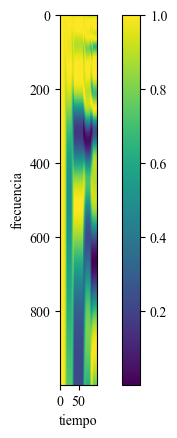

In [17]:
f_range = np.linspace( -1760000000*0.7, 1760000000*0.7, 1000)
ket_0 = basis(2, 0)
S = []

list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]

for fi in f_range:
    procesor_1 = CompositeGateProcessor(n_points_pulse_Ri = 10, f_rage = fi)
    state_dru = procesor_1.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)
    t,probability_0, probability_1 = measure_compuse_states(procesor_1, list_states_overlap)
    S.append(probability_0)


# Crear la figura y el eje para la imagen
fig, ax = plt.subplots()
datos_np = np.array(S)
# Mostrar la imagen con intensidades normalizadas
imagen = ax.imshow(datos_np, cmap='viridis', interpolation='nearest')
# Agregar barra de colores
fig.colorbar(imagen)
# Agregar etiquetas de los ejes
ax.set_xlabel('tiempo')
ax.set_ylabel('frecuencia')
# Mostrar la imagen
plt.show()

In [ ]:
procesor_1.

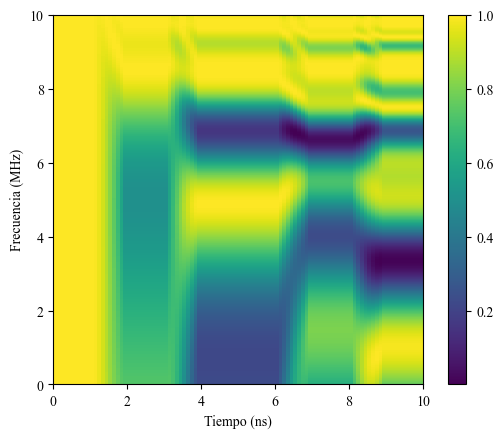

In [20]:
# Escalar la frecuencia a MHz
f_range_mhz = f_range / 1e6

# Escalar el tiempo a nanosegundos (suponiendo que tienes los valores de tiempo en segundos)
# t en segundos
t_ns = t * 1e9

# Crear la figura y el eje para la imagen
fig, ax = plt.subplots()

# Mostrar la imagen con intensidades normalizadas
imagen = ax.imshow(datos_np, cmap='viridis', interpolation='nearest', extent=[0 , 10, 0, 10])

# Agregar barra de colores
fig.colorbar(imagen)

# Agregar etiquetas de los ejes
ax.set_xlabel('Tiempo (ns)')
ax.set_ylabel('Frecuencia (MHz)')

# Mostrar la imagen
plt.show()

# Prueba 2 qubits

In [8]:
# Estado inicial
from qutip import tensor
ket_0 = tensor(basis(2, 0),basis(2, 0))

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2)
angle = 5*np.pi
out = procesor_1.CZ(ket_0, [], tf_expectt=False)

# get tme and states:
t = procesor_1.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = np.array([[1, 0]])
probability_0 = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = np.array([[0, 1]])
probability_1 = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plt.show()

time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966


AttributeError: 'Qobj' object has no attribute 'states'